In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import remez, kaiserord, firwin, lfilter, freqz
from scipy.fft import fft, fftfreq

In [5]:
fs = 800

delta_p = 1
delta_s = 50 # abszolut ertek
f0 = 50
transition_width = 30

nyq_rate = fs / 2
width = transition_width / nyq_rate
ripple_db = delta_s

N, beta = kaiserord(ripple_db, width)
if N % 2 == 0:
    N += 1

print(f"A szuro rendje {N}")

A szuro rendje 81


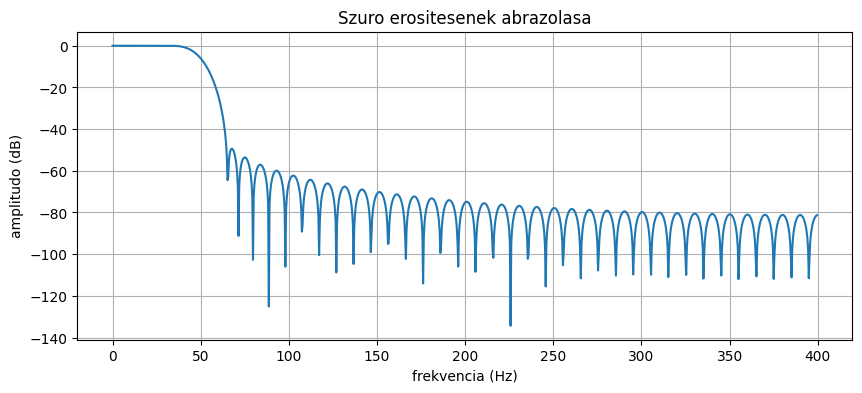

In [8]:
taps = firwin(N, f0, window=('kaiser', beta), fs=fs)

w, h = freqz(taps, worN=1024, fs=fs)

plt.figure(figsize=(10, 4))
plt.plot(w, 20 * np.log10(np.abs(h)))
plt.title("Szuro erositesenek abrazolasa")
plt.xlabel("frekvencia (Hz)")
plt.ylabel("amplitudo (dB)")
plt.grid()
plt.show()

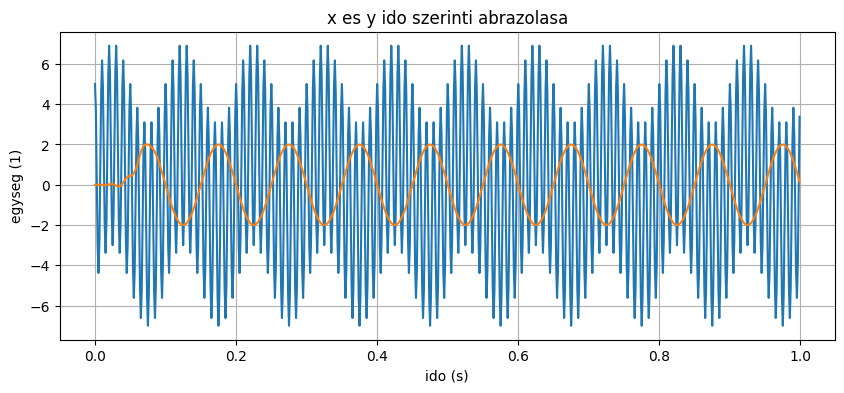

In [12]:
t = np.arange(0, 1, 1/fs)
x = 2 * np.sin(20 * np.pi * t) + 5 * np.cos(200 * np.pi * t)

y = lfilter(taps, 1.0, x)

plt.figure(figsize=(10, 4))
plt.title("x es y ido szerinti abrazolasa")
plt.plot(t, x)
plt.plot(t, y)
plt.grid()
plt.xlabel("ido (s)")
plt.ylabel("egyseg (1)")
plt.show()

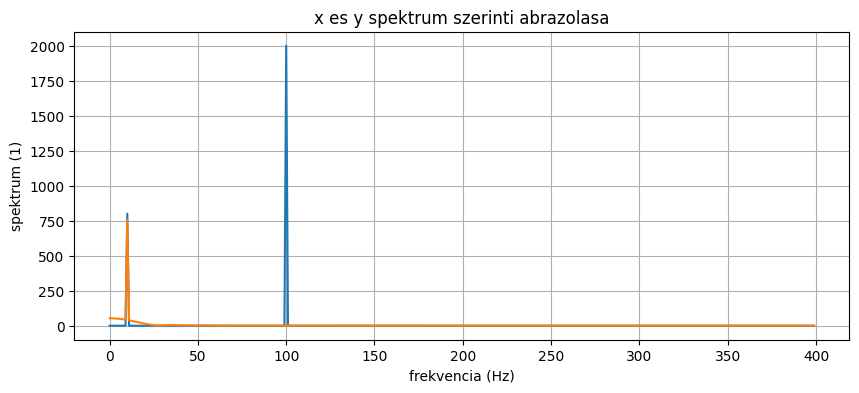

In [13]:
def plot_signal(signal, fs, title):
    n = len(signal)
    f = fftfreq(n, d=1/fs)[:n//2]
    spectrum = np.abs(fft(signal))[:n//2]
    plt.plot(f, spectrum, label=title)

plt.figure(figsize=(10, 4))
plot_signal(x, fs, "x jel")
plot_signal(y, fs, "y jel")
plt.title("x es y spektrum szerinti abrazolasa")
plt.grid()
plt.xlabel("frekvencia (Hz)")
plt.ylabel("spektrum (1)")
plt.show()